# EXPERIMENT - STATE-GROUP-2

# State Groups:

- `group_1`: Patients with low toxicity and low tumor size  - W_0 ~ N(0.5, 0.16**2), T_0 ~ N(0.5, 0.16**2)
- `group_2`: Patients with high toxicity and low tumor size - W_0 ~ N(1.5, 0.16**2), T_0 ~ N(0.5, 0.16**2)
- `group_3`: Patients with low initial toxicity and high tumor size - W_0 ~ N(0.5, 0.16**2), T_0 ~ N(1.5, 0.16**2)
- `group_4`: Patients with high toxicity and high tumor size - W_0 ~ N(1.5, 0.16**2), T_0 ~ N(1.5, 0.16**2)
-  `None`  : Patients with toxicity and tumor size sample from - W_0 ~ U(0,2), T_0 ~  U(0,2)

In [13]:
%load_ext autoreload
%autoreload 2

import tqdm
import _set_path
from pbpi.algo_core.training import evaluations_per_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
ALGO_TYPE = {'original': {'name': 'original', 'exploration': False}
            ,'modified': {'name': 'modified', 'exploration': True} }

---
## Using `tumor size + toxicity` to generate preferences

### Original algorithm

In [15]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 250

configs = { 'CONFIG_NO': 3
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_2'
          , 'init_state_tag': 'g2'
          }

algorithm = ALGO_TYPE['original']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 16


Currently evaluated configs:
 Samples: 250 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


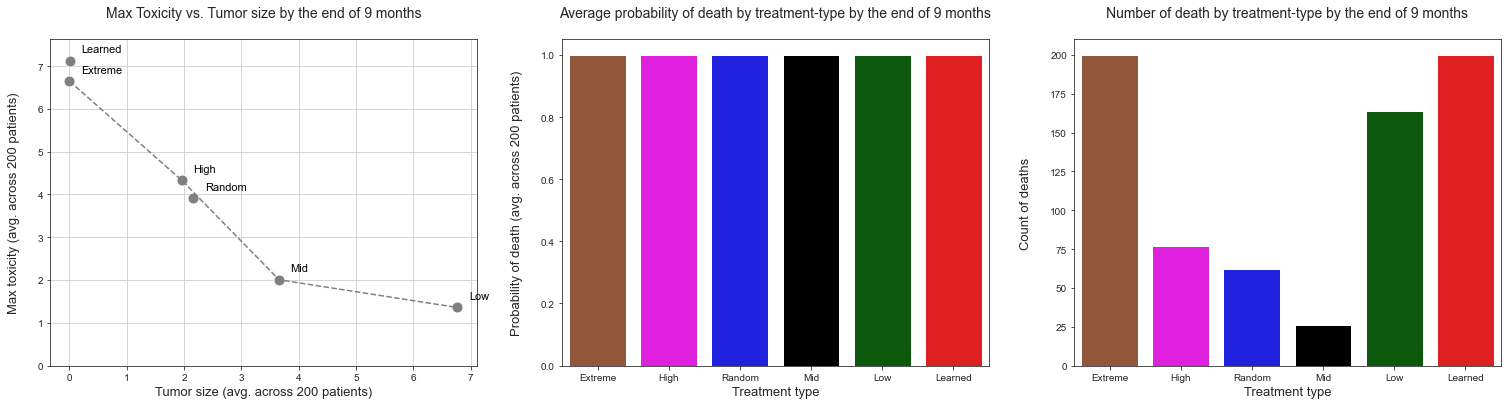

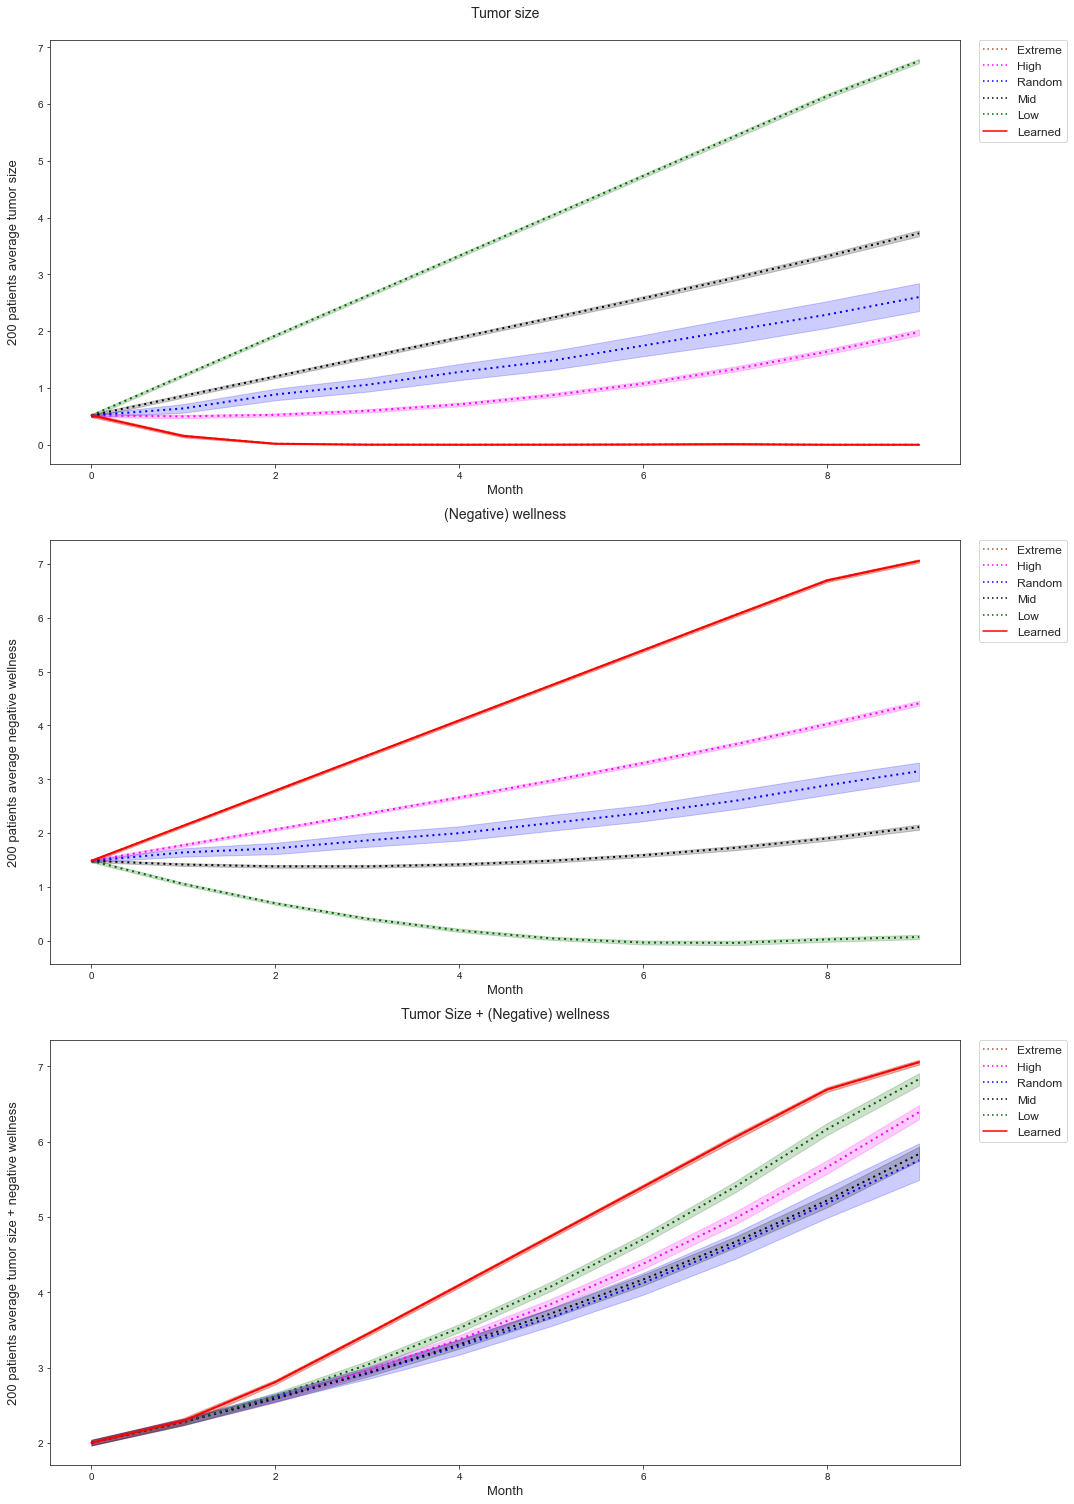


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 0.00960610937892696
                         - Avg. max. toxicity : 7.123361316237471
                         - Avg. tumor size + toxicity (at the end of 9 months): 3.920942717591591
                         - Avg. prob. of death : 0.9999999994886971

No training data collected!
No training data collected!
No training data collected!
No training data collected!
No training data collected!
No training data collected!
No training data collected!
No training data collected!
No training data collected!

Evaluations: 100%|██████████| 1/1 [1:05:10<00:00, 3910.35s/it]


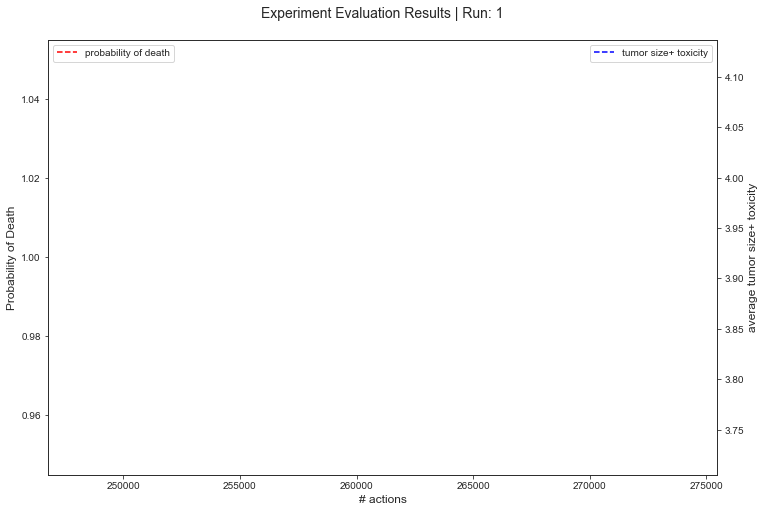

In [16]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 9
                                                , treatment_length_eval     = 9
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = True # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 16
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

### Modified algorithm

In [17]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 250

configs = { 'CONFIG_NO': 4
          , 'S': [N_STATES]
          , 'Actions' : [6]
          , 'Roll-outs': [10]
          , 'Significance' : [0.1]
          , 'init_state_group': 'group_2'
          , 'init_state_tag': 'g2'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Runs:   0%|          | 0/1 [00:00<?, ?it/s]
State generation seed is 16


Currently evaluated configs:
 Samples: 250 | Actions: 6 | Roll-outs: 10 | Significance: 0.1


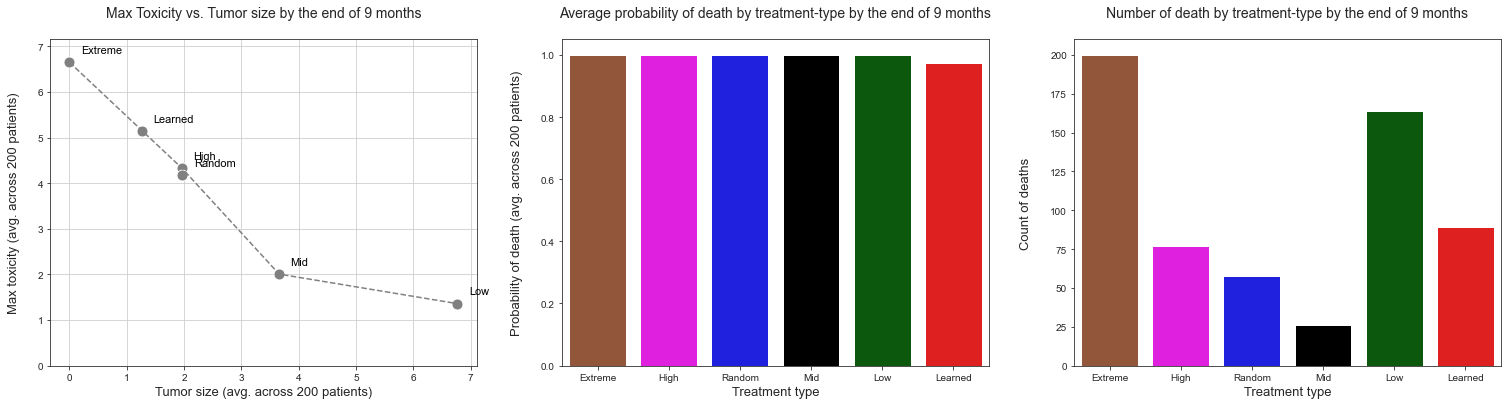

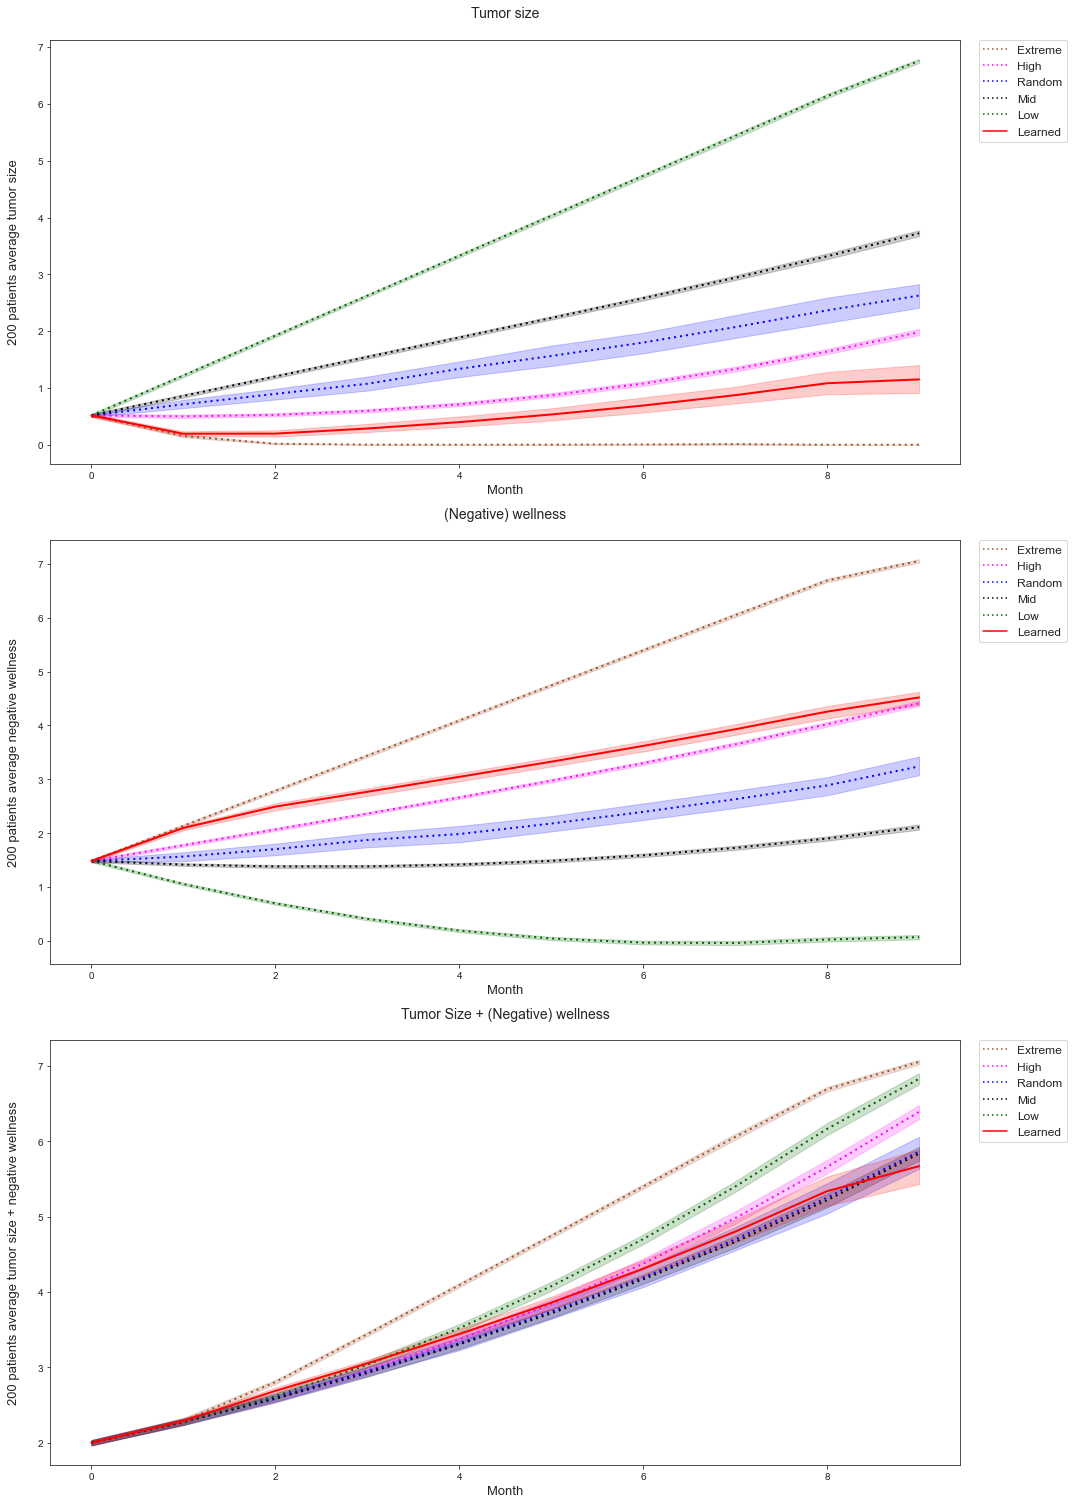


Policy Iteration: 1 - Evaluation results:
                         - Avg. ending tumor size : 1.2631597425267693
                         - Avg. max. toxicity : 5.143695599088772
                         - Avg. tumor size + toxicity (at the end of 9 months): 3.850002372539287
                         - Avg. prob. of death : 0.9755478603328593



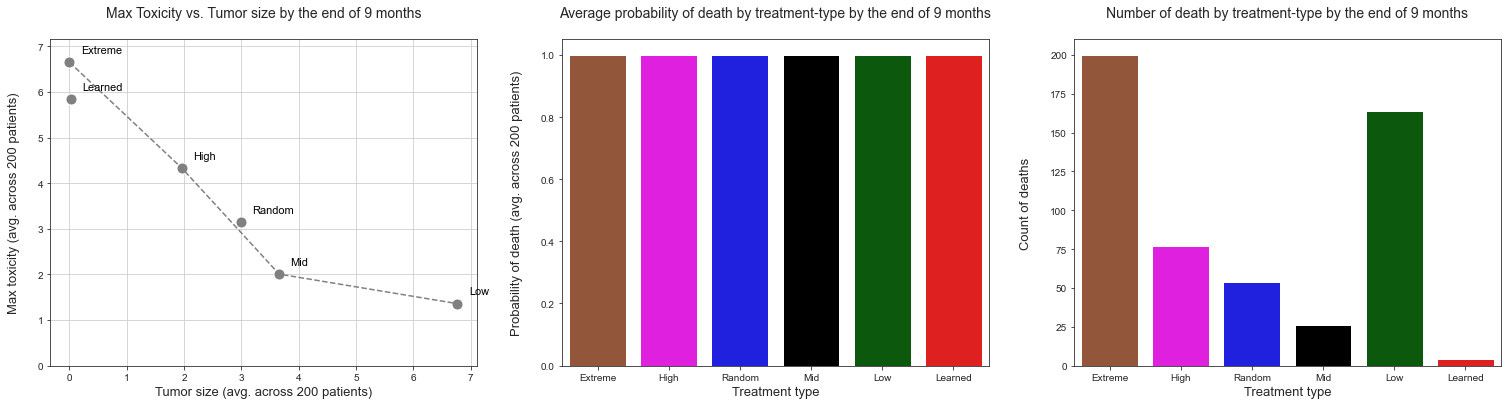

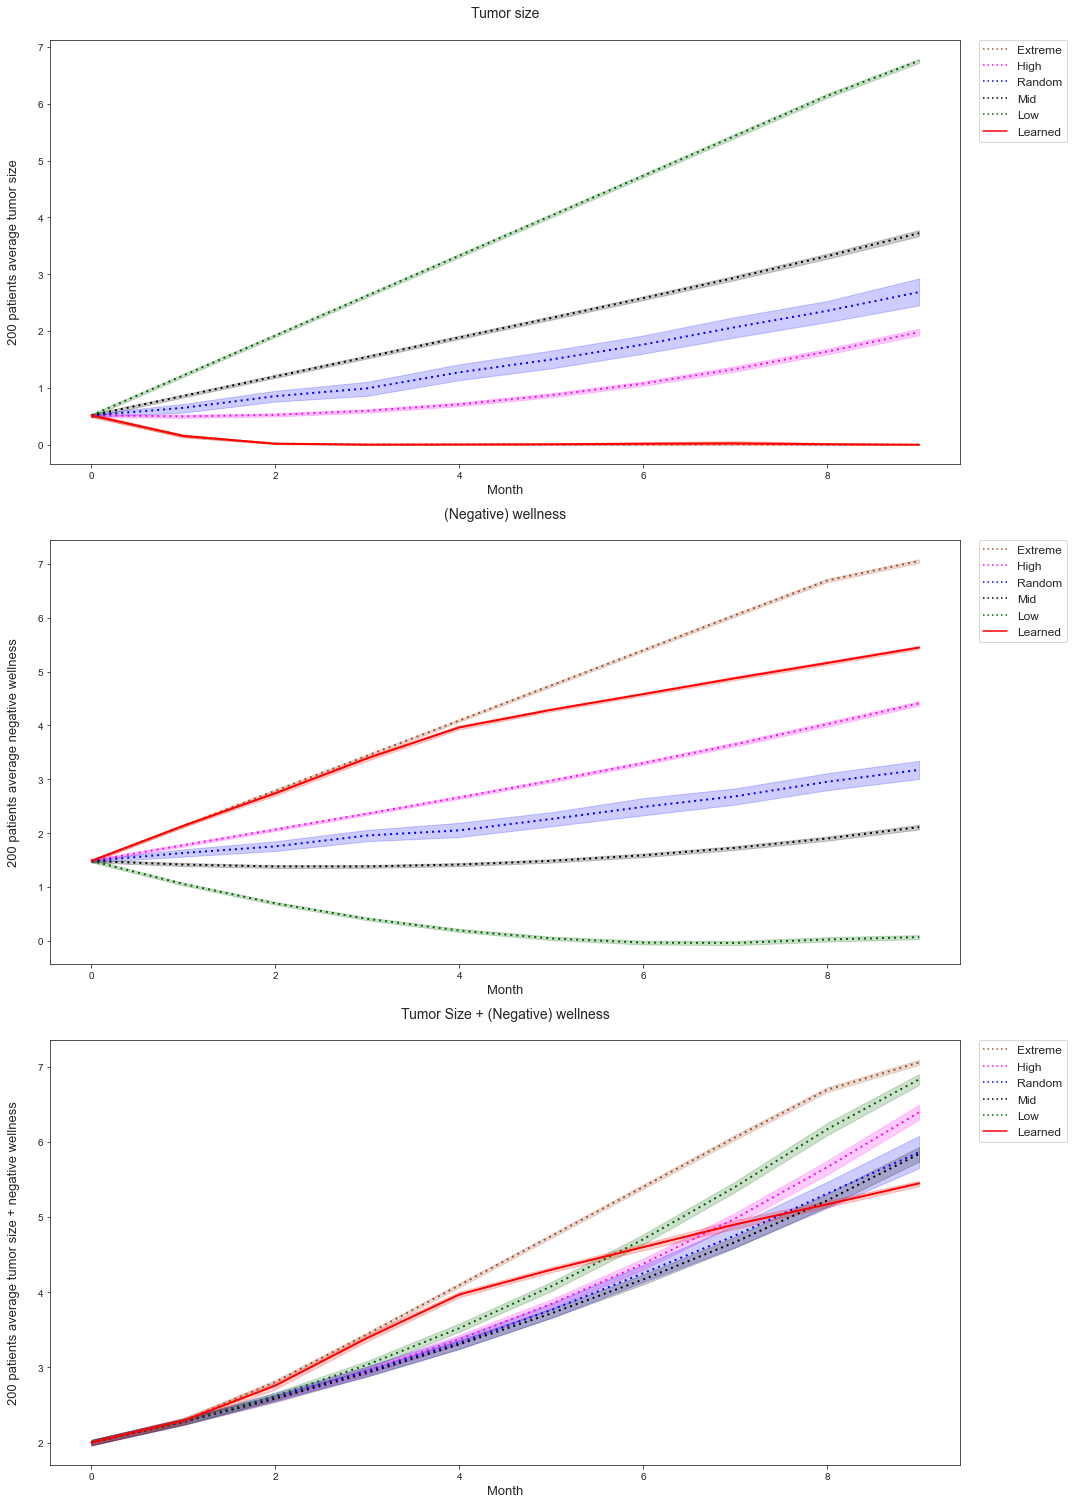


Policy Iteration: 2 - Evaluation results:
                         - Avg. ending tumor size : 0.026816667527357802
                         - Avg. max. toxicity : 5.839468448661698
                         - Avg. tumor size + toxicity (at the end of 9 months): 3.8792121867013063
                         - Avg. prob. of death : 0.9987479892321589



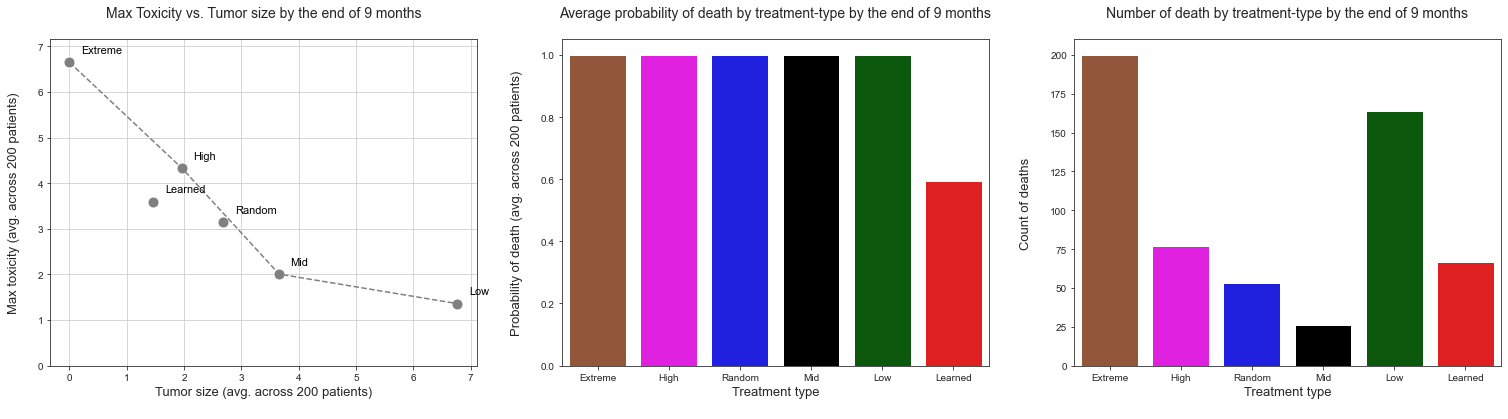

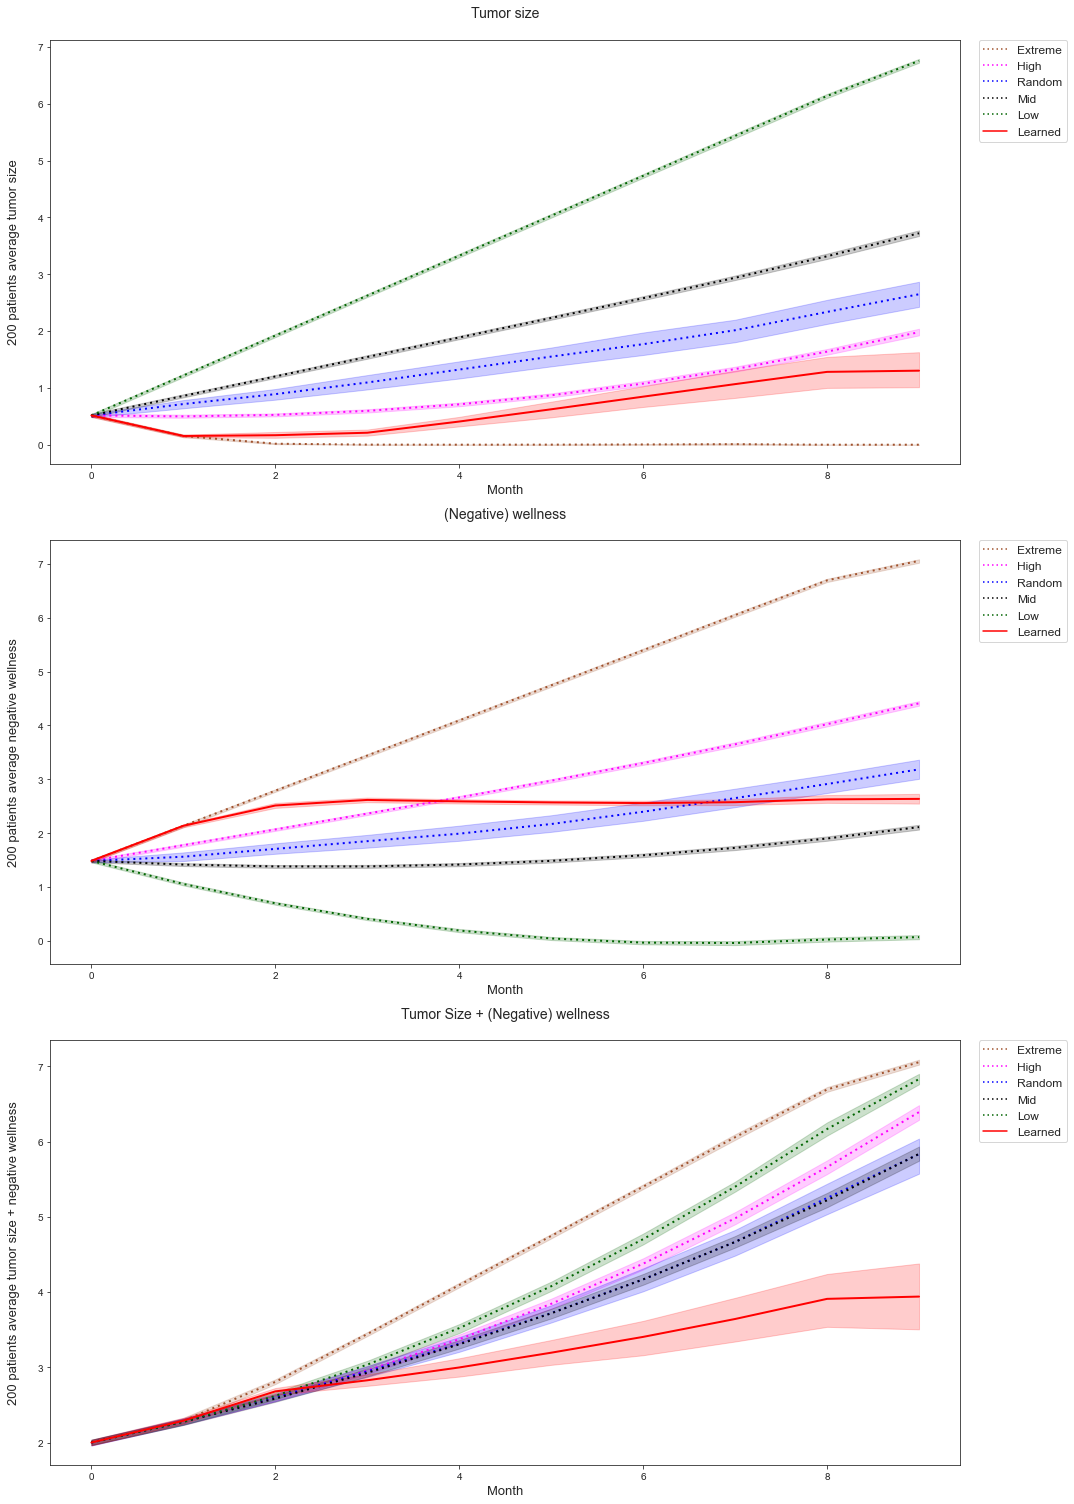


Policy Iteration: 3 - Evaluation results:
                         - Avg. ending tumor size : 1.466942024094177
                         - Avg. max. toxicity : 3.596391036126641
                         - Avg. tumor size + toxicity (at the end of 9 months): 3.7395897612529496
                         - Avg. prob. of death : 0.5945057804041483



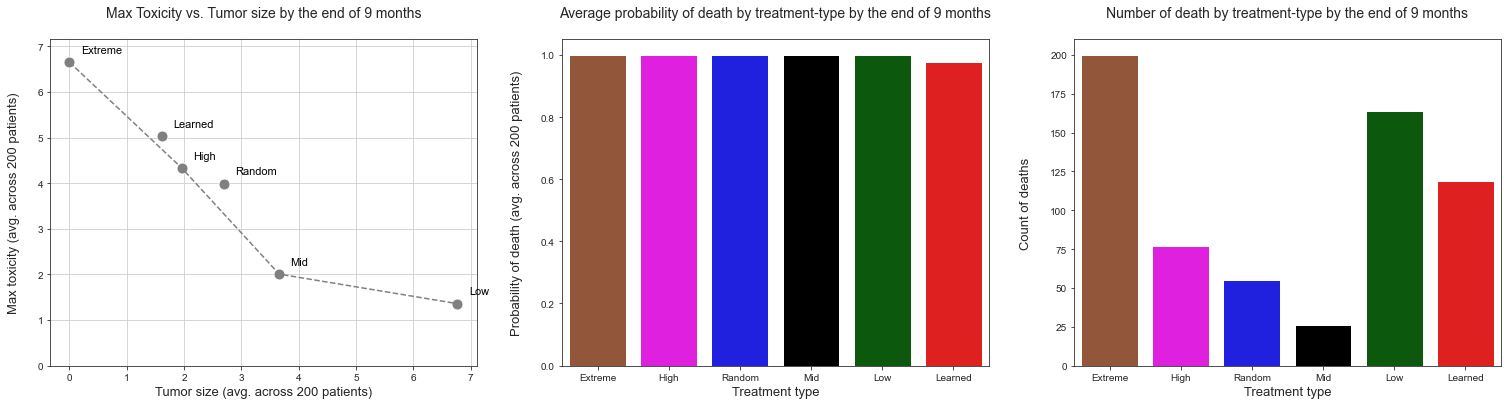

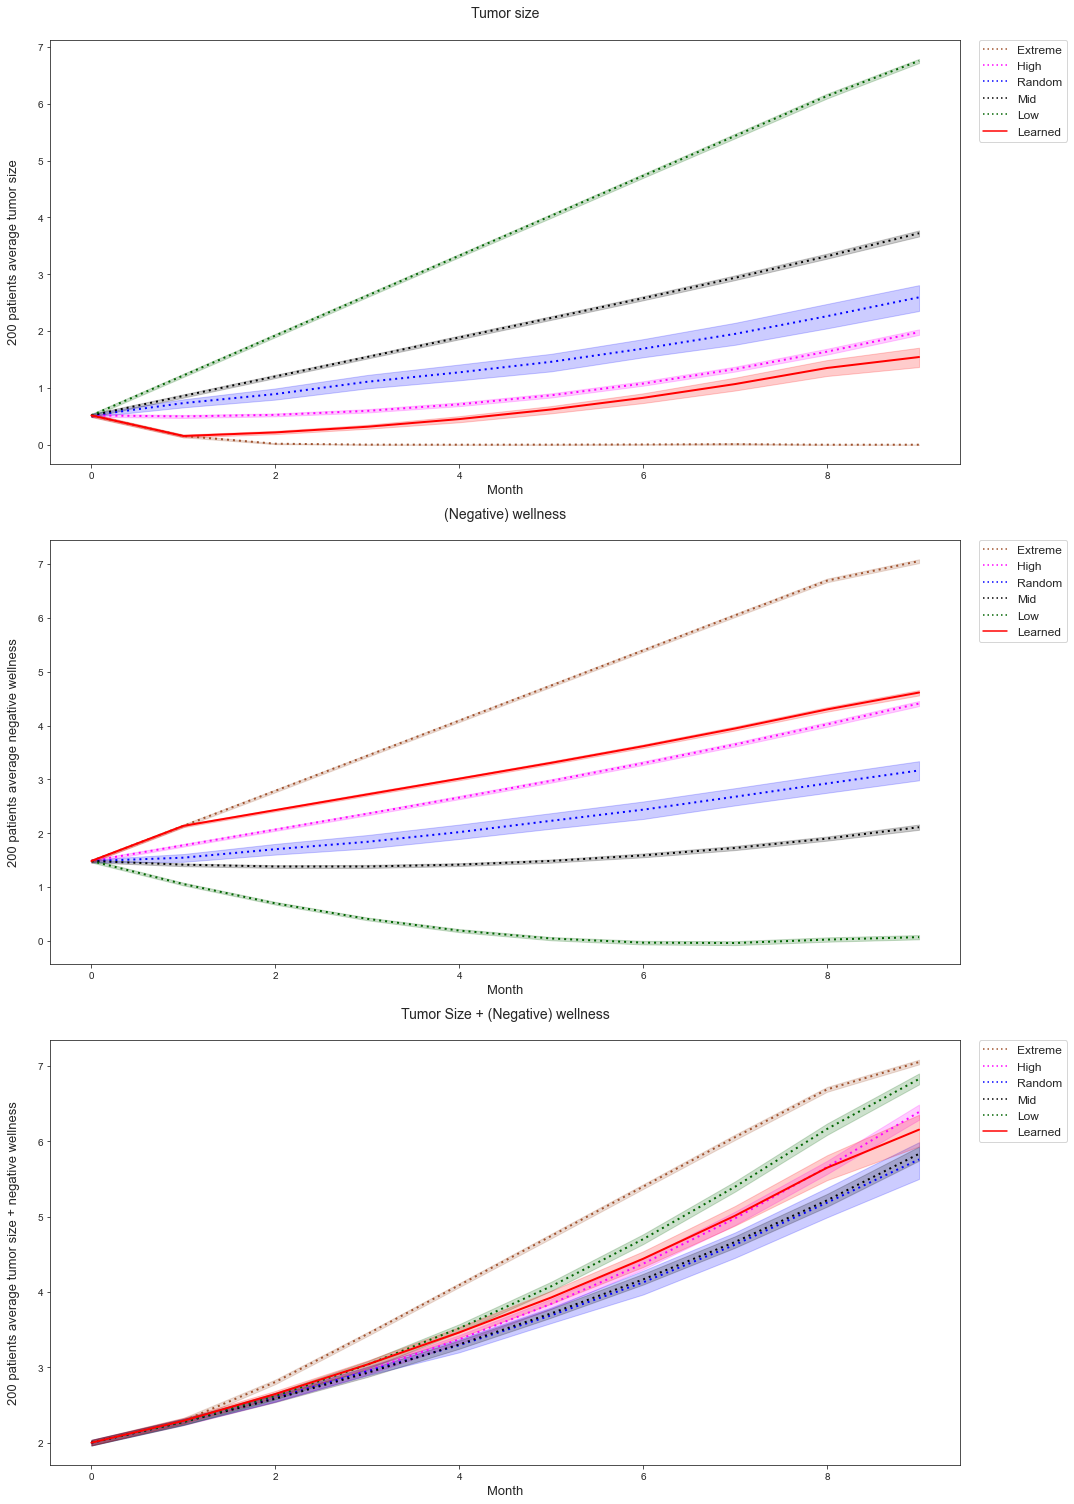


Policy Iteration: 4 - Evaluation results:
                         - Avg. ending tumor size : 1.616012195962363
                         - Avg. max. toxicity : 5.0316483360429
                         - Avg. tumor size + toxicity (at the end of 9 months): 3.8620664715330544
                         - Avg. prob. of death : 0.9785509510632922

Averege death rate increased by 20%! Policy performance decreased! Run-1 terminated!

Evaluations: 100%|██████████| 1/1 [29:40<00:00, 1780.75s/it]


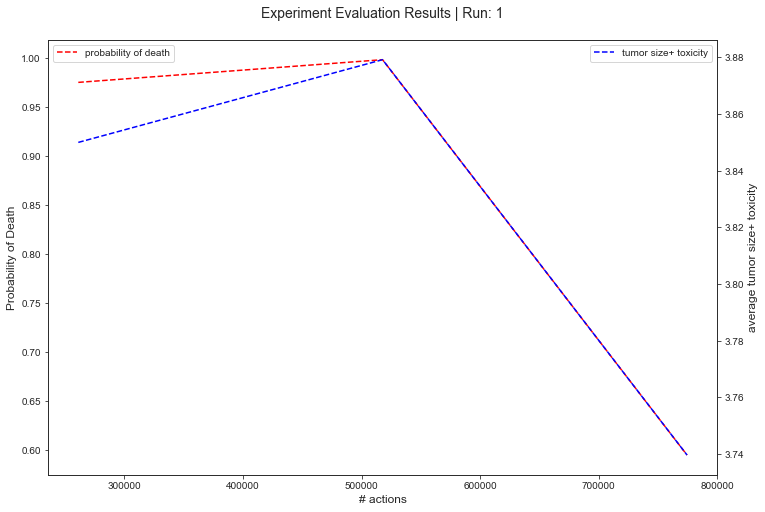

In [18]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size                     = sample_size
                                                , init_state_group          = configs['init_state_group']

                                                , n_actions                 = configs['Actions'][0]
                                                , max_n_rollouts            = rollout_max
                                                , sig_lvl                   = sig_lvl

                                                , treatment_length_train    = 9
                                                , treatment_length_eval     = 9
                                                
                                                , max_policy_iter_per_run   = 10 # Maximum number of policy iterations per experiment
                                                , runs_per_config           = 1  # Number of experiments per one parameter config

                                                , eval_runs_per_state       = 1  # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr          = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = True  # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = False # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = False # Show death-rate/tumor-size+toxicity vs. action no. plot of exp. run

                                                , use_toxi_n_tumor_for_pref = True # Generate preferences using sum(max-toxi, tumor-size) of rollouts
                                                , set_seed                  = 16
                                                , init_state_tag            = configs['init_state_tag']
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()